###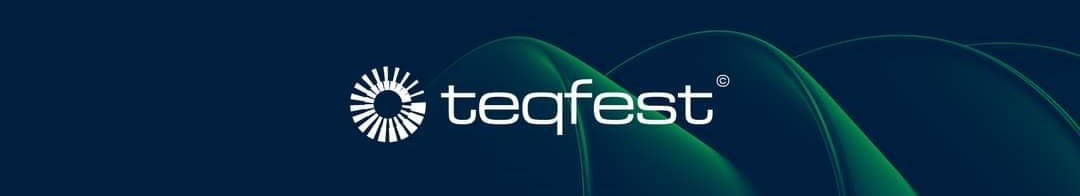
# TeqFest Hackathon Project Submission

## Members:
- Nourhan Mahmoud
- Selsabeel Asim Mohamed
- Basma Mahmoud Hashem
- Roaa Fathi Nada

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'brain-mri-images-for-brain-tumor-detection:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F165566%2F377107%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240416%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240416T103350Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dd78bdc26b3ec098a79f282e51685daa1a1201a892659025acb73b957ca256df9db7a2e6d49d4731564836885e830b6a2097d7b33908e7aa4e3c6c52882b01423816c2e1f6cb5b3c22aa3b668bd812afd3252a98f602da6b9dc1b94c001121a63fb2b187b4791bd1efc2cac24950575577fa13de568de8c8b4b386a535777521e44bc6f2c7d50dc4c88b3733725ba42086fb0cd2d965aa07a740c45a6c2d42d19d037cf57cfab9eed358df5890ff4449fa753edb7c6946d10fe840a0712efbbe557ea8187149452b7822eb640f5f864b4e2cb9c468147306b2a0dd33a4153dcbcae8724d41466915d087bd936e5fdff037934193eb565337775a3c2317914efb6,brain-tumor-classification-mri:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F672377%2F1183165%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240416%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240416T103351Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D87606769eeb4aea53451d901829e6652a6faa0165460683f5e8559ccf25de62e9430db291c9493c45e5608562e7f8cce30f4d8aeaa0f2b4acc02f2dbabac9a3335fe4a4a1c3c14146a333dc360324be3588bf53b74ce9b301f876052adbeeea5f2c778859d66d76291a602df077296e83ab2612094db5636de3d2d7c0b22a08931be0c0f16f52983f0fc8a9aa35b275ff238f5930b5622b370439618a3d0912a5157e7dbfbcd4729ce4dca4eea89968860bc960f1e109f58c6516df20ce97505ea237c0400ef3b61aab184b263b42c75ee4fab8e13545af371de93dc35697d7e8a6bf02f6befea3487923f02637939f44a5af97ef83a48a4627f3e8476b9120e'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 15828590 bytes downloaded
Downloaded and uncompressed: brain-mri-images-for-brain-tumor-detection
[==================================================] 91002358 bytes downloaded
Downloaded and uncompressed: brain-tumor-classification-mri
Data source import complete.


In [ ]:
import pandas as pd
import os, warnings
warnings.filterwarnings("ignore") # to clean up output cells
import shutil
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import gridspec
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers


## First Dataset: Brain Tumor Classification MRI

In [ ]:
dataset_directory = '/kaggle/input/brain-tumor-classification-mri'
training_dir = os.path.join(dataset_directory, 'Training')
testing_dir = os.path.join(dataset_directory, 'Testing')

categories = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
training_destination = '/kaggle/working/train'
testing_destination = '/kaggle/working/valid1'

# Training Set
for category in categories:
    category_dir = os.path.join(training_dir, category)

    image_paths = [os.path.join(category_dir, img) for img in os.listdir(category_dir)]

    if category == 'no_tumor':
        destination_category = 'no'
    else:
        destination_category = 'yes'

    destination_category_folder = os.path.join(training_destination, destination_category)
    os.makedirs(destination_category_folder, exist_ok=True)

    for img in image_paths:
        shutil.copy(img, destination_category_folder)


# Validation Set
for category in categories:
    category_dir = os.path.join(testing_dir, category)

    image_paths = [os.path.join(category_dir, img) for img in os.listdir(category_dir)]

    if category == 'no_tumor':
        destination_category = 'no'
    else:
        destination_category = 'yes'

    destination_category_folder = os.path.join(testing_destination, destination_category)
    os.makedirs(destination_category_folder, exist_ok=True)

    for img in image_paths:
        shutil.copy(img, destination_category_folder)


In [ ]:
# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed(31415)

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')


# Load training and validation sets
ds_train_ = image_dataset_from_directory(
    '/kaggle/working/train',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
ds_valid_ = image_dataset_from_directory(
    '/kaggle/working/valid1',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

Found 3072 files belonging to 2 classes.
Found 220 files belonging to 2 classes.


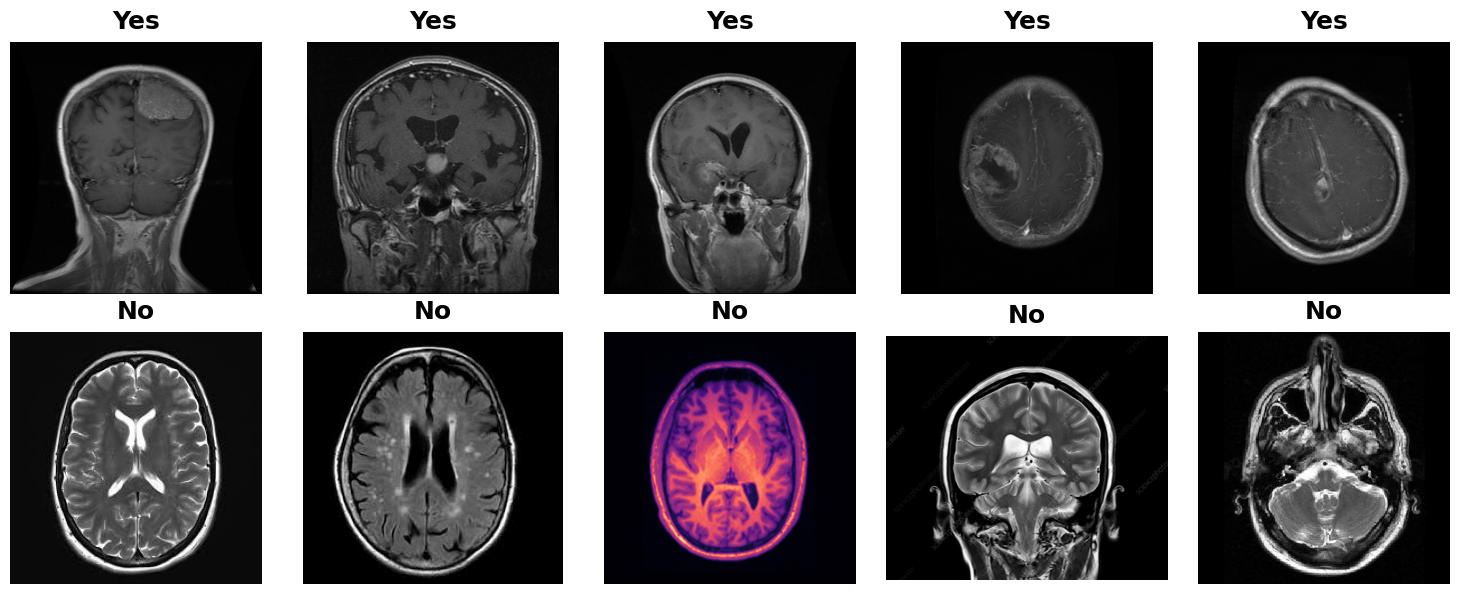

In [ ]:
yes_imgs = random.sample(os.listdir('/kaggle/working/train/yes'), 5)
no_imgs = random.sample(os.listdir('/kaggle/working/train/no'), 5)

plt.figure(figsize=(15,6))
for i, img in enumerate(yes_imgs + no_imgs, 1):
    plt.subplot(2, 5, i)
    image_path = os.path.join('/kaggle/working/train/yes' if img in yes_imgs else '/kaggle/working/train/no', img)
    image = mpimg.imread(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.title('Yes' if img in yes_imgs else 'No')

plt.show()

## Second Dataset : Brain MRI Images for Brain Tumor Detection

In [ ]:
import os
import random
import shutil

categories = ['yes', 'no']

for c in categories:
    category_dir = os.path.join('/kaggle/input/brain-mri-images-for-brain-tumor-detection', c)
    image_paths = [os.path.join(category_dir, img) for img in os.listdir(category_dir)]

    for img in image_paths:
      destination = os.path.join('/kaggle/working/valid2', c)
      os.makedirs(destination, exist_ok=True)
      shutil.copy(img, destination)

print("Validation dataset created successfully.")


Validation dataset created successfully.


In [ ]:
ds_valid_2 = image_dataset_from_directory(
    '/kaggle/working/valid2',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)
ds_valid2 = (
    ds_valid_2
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

Found 253 files belonging to 2 classes.


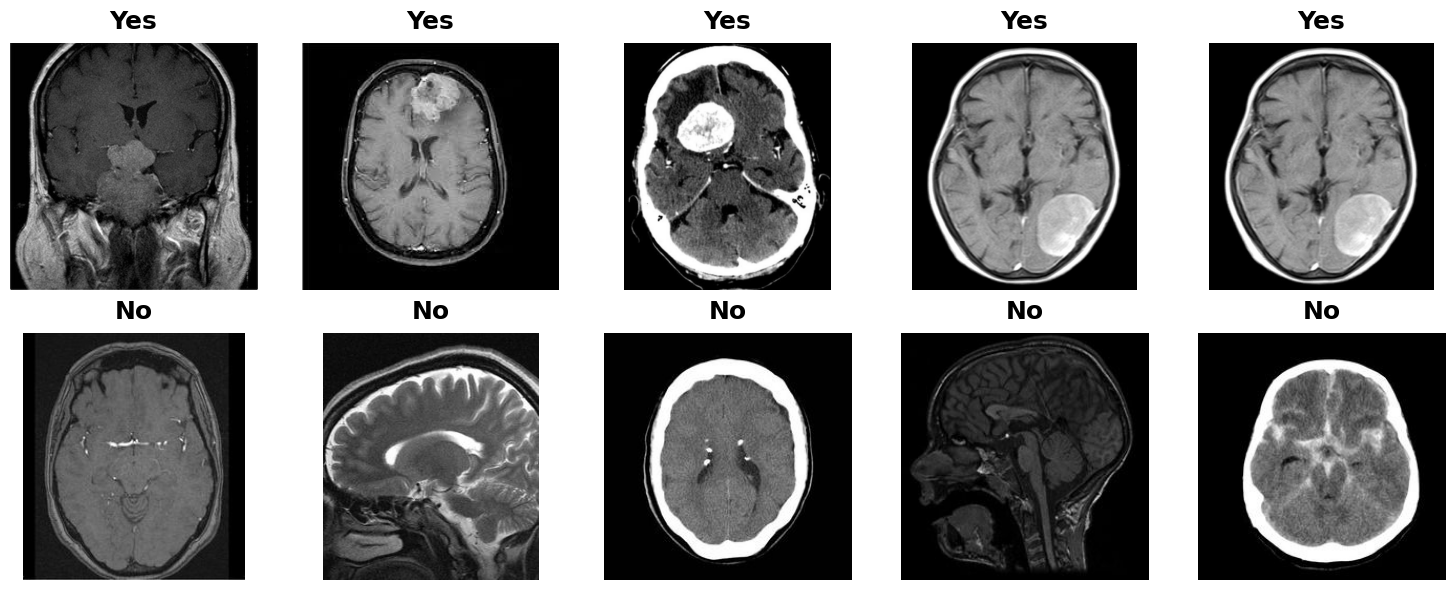

In [ ]:
yes_imgs = random.sample(os.listdir('/kaggle/working/valid2/yes'), 5)
no_imgs = random.sample(os.listdir('/kaggle/working/valid2/no'), 5)

plt.figure(figsize=(15,6))
for i, img in enumerate(yes_imgs + no_imgs, 1):
    plt.subplot(2, 5, i)
    image_path = os.path.join('/kaggle/working/valid2/yes' if img in yes_imgs else '/kaggle/working/valid2/no', img)
    image = mpimg.imread(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.title('Yes' if img in yes_imgs else 'No')

plt.show()

In [ ]:
combined_valid_ds = tf.data.Dataset.zip((ds_valid, ds_valid2))


In [ ]:
input_shape = (128, 128, 3)

pretrained_base = ResNet50(weights=None, include_top=False, input_shape=input_shape)

pretrained_base.trainable = False

In [ ]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Define L2 regularization strength
l2_strength = 0.001


In [ ]:
model = tf.keras.Sequential([
    pretrained_base,
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(6, activation='relu',kernel_regularizer=regularizers.l2(l2_strength)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(l2_strength)),

])

In [ ]:
# train the modle
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall, F1Score

model.compile(

    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),

    loss='binary_crossentropy',

    metrics=[BinaryAccuracy(), Precision(), Recall(), F1Score()]

)


In [ ]:
history = model.fit(
    ds_train,
    validation_data= ds_valid,
    epochs=30,
)

Epoch 1/30
48/48 [==============================] - 208s 4s/step - loss: 0.7291 - binary_accuracy: 0.5638 - precision_2: 0.9012 - recall_2: 0.5441 - f1_score: 0.9166 - val_loss: 0.7108 - val_binary_accuracy: 0.4773 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - val_f1_score: 0.6866
Epoch 2/30
48/48 [==============================] - 187s 4s/step - loss: 0.5977 - binary_accuracy: 0.7158 - precision_2: 0.9485 - recall_2: 0.7022 - f1_score: 0.9166 - val_loss: 0.7065 - val_binary_accuracy: 0.4773 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - val_f1_score: 0.6866
Epoch 3/30
48/48 [==============================] - 187s 4s/step - loss: 0.5279 - binary_accuracy: 0.7982 - precision_2: 0.9661 - recall_2: 0.7891 - f1_score: 0.9166 - val_loss: 0.6948 - val_binary_accuracy: 0.4864 - val_precision_2: 0.7500 - val_recall_2: 0.0261 - val_f1_score: 0.6866
Epoch 4/30
48/48 [==============================] - 184s 4s/step - loss: 0.4688 - binary_accuracy: 0.8190 - precision_2: 0.

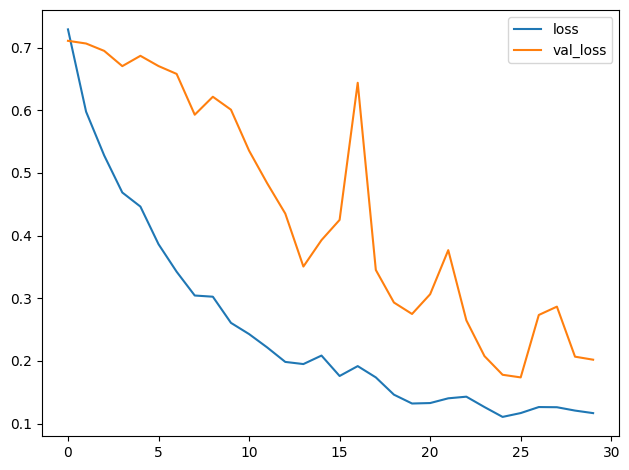

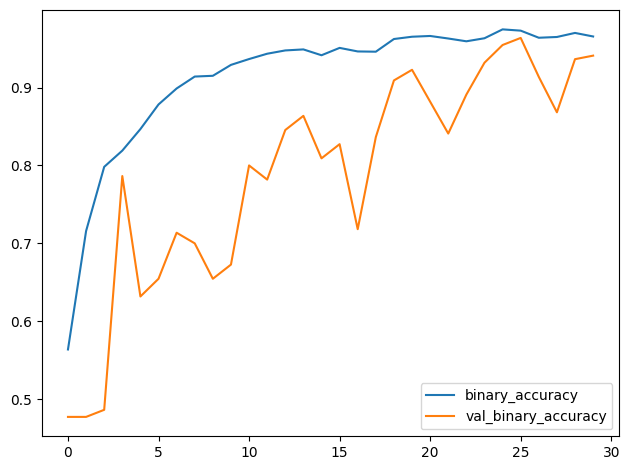

In [ ]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

In [ ]:
# Function to convert images to floats
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

# Path to the new dataset directory
new_dataset_dir = '/kaggle/working/valid2'

# Create a tf.data.Dataset object from the new dataset directory
ds_new = image_dataset_from_directory(
    new_dataset_dir,
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

# Preprocess the new dataset
ds_new = ds_new.map(convert_to_float).cache().prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

Found 253 files belonging to 2 classes.


In [ ]:
# Evaluate the model on the new dataset
loss_new, accuracy_new, precision_new, recall_new, f1_score_new = model.evaluate(ds_new)


4/4 [==============================] - 14s 3s/step - loss: 0.1983 - binary_accuracy: 0.9328 - precision_2: 0.9107 - recall_2: 0.9871 - f1_score: 0.7598
